<a href="https://colab.research.google.com/github/brianju0218/Machine-Learning-for-Engineers-S25/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This homework is designed to test your understanding of neural networks for classification and regression tasks. Use a Jupyter notebook to solve individual problems. You can submit a pdf printouts of the notebooks. Please include your name and RIN in the PDF. Please keep your notebooks and Python codes organized in your Github repository

Name: Brian Ju
RIN: 662003139

1. Construct a fully connected neural network model for classifying the CIFAR-10
dataset. Use a 70%-30% split for training and validation data

a.) Visualize the data by plotting an image from each category from the
CIFAR-10 dataset.


In [2]:
pip install --upgrade scikeras scikit-learn

In [2]:
from keras.datasets import cifar10
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# splitting the data into 70-30
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
print(X_train.shape) #(35000, 32, 32, 3) 35000 images, 32x32 pixels, 3 channels of color
print(y_train.shape) # 35000 labels (0, 1, 2, 3, etc.)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
print(y_train)

[[7]
 [3]
 [9]
 ...
 [8]
 [8]
 [8]]


In [5]:
import numpy as np
unique = np.unique(y_train)
print(unique) # 10 LABELS

[0 1 2 3 4 5 6 7 8 9]


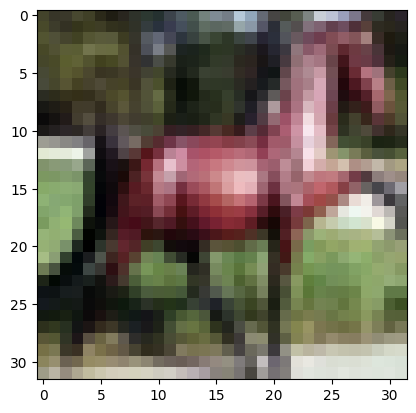

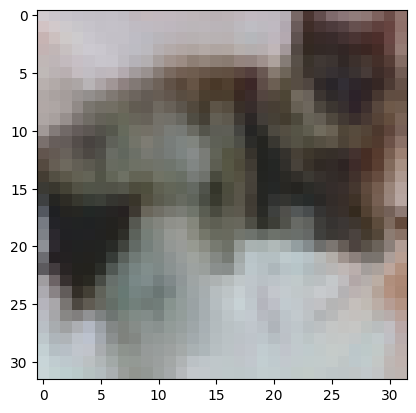

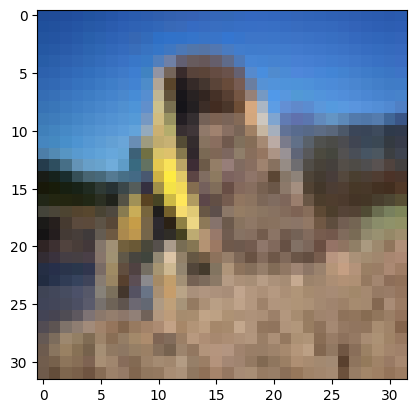

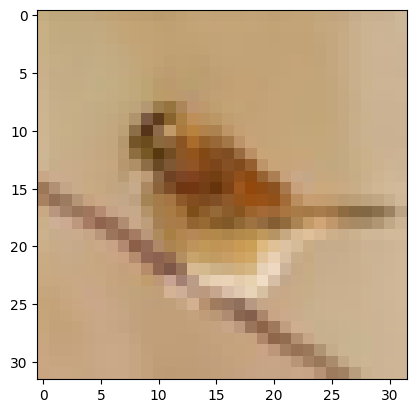

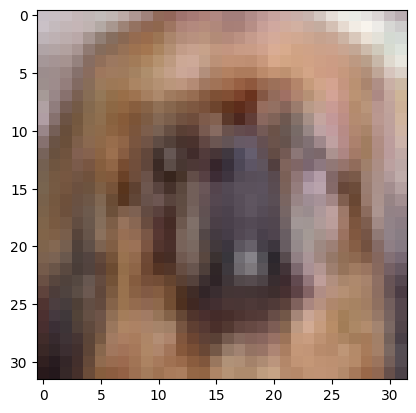

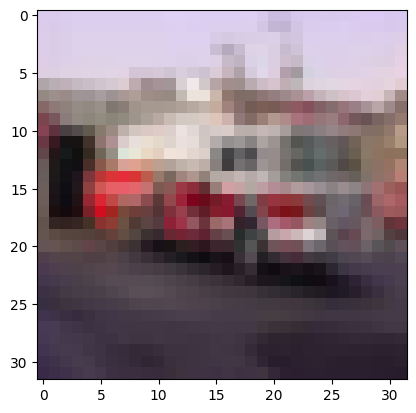

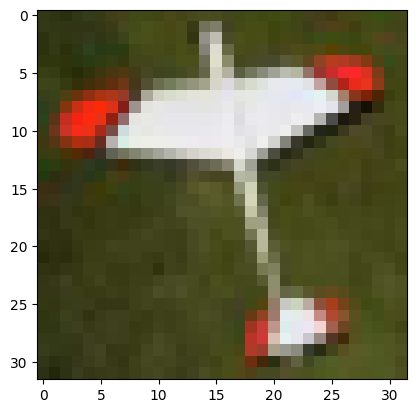

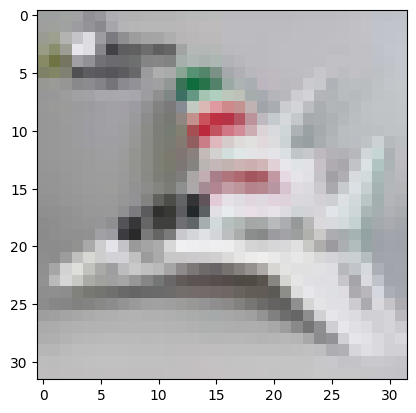

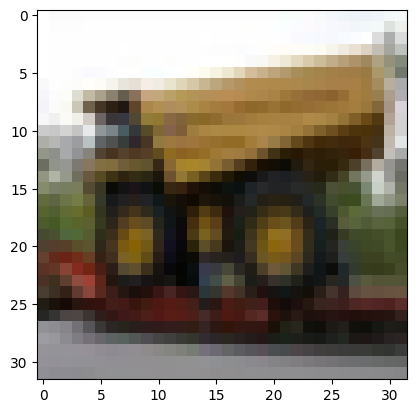

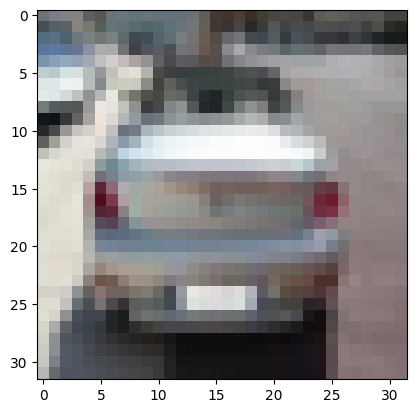

In [6]:
import matplotlib.pyplot as plt
for i in unique:
    plt.figure()
    plt.imshow(X_train[i])

b.) Demonstrate the tuning of the hyperparameters of the neural network
via grid-search.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# reshape image data as 1D vectors
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train[0])

(35000, 3072)
(15000, 3072)
(10000, 3072)
[ 67  67  43 ... 218 225 216]


In [8]:
# reshape image data as 1D vectors ranging from 0 to 1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])

[0.2627451  0.2627451  0.16862746 ... 0.85490197 0.88235295 0.84705883]


In [9]:
# reshape the label data as one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
# creating a function that creates NN models based on given parameters to change
# NN architecture
def create_model(layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()

    # input layer
    model.add(Dense(neurons, activation=activation, input_shape=(32*32*3, )))

    # hidden layers
    for i in range(layers-1):
        model.add(Dense(neurons, activation=activation))
    # output layer
    model.add(Dense(10, activation='softmax')) # 10 for 10 labels and softmax for classification

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [12]:
test_model = create_model()
history = test_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)
test_loss, test_acc = test_model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1209 - loss: 2.2733
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1721 - loss: 2.1425
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1768 - loss: 2.1038
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1744 - loss: 2.0875
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1774 - loss: 2.0793
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1719 - loss: 2.0696
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1808 - loss: 2.0680
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1793 - loss: 2.0664
Epoch 9/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1778 - loss: 2.0638
Epoch 10/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1806 - loss: 2.0604
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1824 - loss: 2.0554
Test accuracy: 0.18406666815280914


In [14]:
hidden_layers = [1, 2, 3]
neurons = [16, 32, 64, 128]
activations = ['relu', 'sigmoid']
learning_rates = [0.001, 0.01, 0.1]
model_errors = {}
for hidden_layer in hidden_layers:
    for neuron in neurons:
        for activation in activations:
            for learning_rate in learning_rates:
                model = create_model(layers=hidden_layer, neurons=neuron, activation=activation, learning_rate=learning_rate)
                history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=0)
                test_loss, test_acc = model.evaluate(X_val, y_val)
                print(f'Hidden Layers: {hidden_layer}, Neurons: {neuron}, Activation: {activation}, Learning Rate: {learning_rate}')
                print(f'Test accuracy: {test_acc}')

                # making a unique key for the dictionary for the model version
                model_key = f"layers_{hidden_layer}_neurons_{neuron}_activation_{activation}_lr_{learning_rate}"
                # Store the errors in the dictionary
                model_errors[model_key] = {
                    "loss": test_loss,
                    "accuracy": test_acc
                }

Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_218 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.3030
Hidden Layers: 1, Neurons: 16, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.0957999974489212


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_220 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1019 - loss: 2.3059
Hidden Layers: 1, Neurons: 16, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.10159999877214432


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_222 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.3197
Hidden Layers: 1, Neurons: 16, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0957999974489212


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_224 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3577 - loss: 1.7878
Hidden Layers: 1, Neurons: 16, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.35866665840148926


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_226 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1019 - loss: 2.3138
Hidden Layers: 1, Neurons: 16, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.10159999877214432


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_228 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,338 (192.73 KB)

 Trainable params: 49,338 (192.73 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1022 - loss: 2.3871
Hidden Layers: 1, Neurons: 16, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10279999673366547


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_230 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1821 - loss: 2.0789
Hidden Layers: 1, Neurons: 32, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.18413333594799042


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_232 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1027 - loss: 2.3040
Hidden Layers: 1, Neurons: 32, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.10300000011920929


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_234 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1014 - loss: 2.3158
Hidden Layers: 1, Neurons: 32, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.09939999878406525


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_236 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3895 - loss: 1.7095
Hidden Layers: 1, Neurons: 32, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.39399999380111694


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_238 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1628 - loss: 2.1302
Hidden Layers: 1, Neurons: 32, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.16126666963100433


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_240 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,666 (385.41 KB)

 Trainable params: 98,666 (385.41 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.3842
Hidden Layers: 1, Neurons: 32, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.0957999974489212


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_242 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3496 - loss: 1.7950
Hidden Layers: 1, Neurons: 64, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.3562000095844269


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_244 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1014 - loss: 2.3035
Hidden Layers: 1, Neurons: 64, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.09939999878406525


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0969 - loss: 2.3135
Hidden Layers: 1, Neurons: 64, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0982000008225441


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_248 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3921 - loss: 1.7034
Hidden Layers: 1, Neurons: 64, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.39006665349006653


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_250 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0967 - loss: 2.3316
Hidden Layers: 1, Neurons: 64, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.09806666523218155


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_252 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.6354
Hidden Layers: 1, Neurons: 64, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.0957999974489212


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_254 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4225 - loss: 1.6191
Hidden Layers: 1, Neurons: 128, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.42633333802223206


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_256 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1544 - loss: 2.1524
Hidden Layers: 1, Neurons: 128, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.15520000457763672


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_258 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0969 - loss: 2.3306
Hidden Layers: 1, Neurons: 128, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0982000008225441


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_260 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4156 - loss: 1.6516
Hidden Layers: 1, Neurons: 128, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.41626667976379395


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_262 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1725 - loss: 2.1212
Hidden Layers: 1, Neurons: 128, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.17633333802223206


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_264 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1019 - loss: 3.0509
Hidden Layers: 1, Neurons: 128, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10306666791439056


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_266 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1921 - loss: 2.0500
Hidden Layers: 2, Neurons: 16, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.19273333251476288


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_269 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1008 - loss: 2.3029
Hidden Layers: 2, Neurons: 16, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.10000000149011612


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_272 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1027 - loss: 2.3236
Hidden Layers: 2, Neurons: 16, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.10300000011920929


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_275 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3132 - loss: 1.8802
Hidden Layers: 2, Neurons: 16, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.3165999948978424


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_278 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1679 - loss: 2.1536
Hidden Layers: 2, Neurons: 16, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.1701333373785019


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_281 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1022 - loss: 2.3089
Hidden Layers: 2, Neurons: 16, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10279999673366547


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_284 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3869 - loss: 1.7067
Hidden Layers: 2, Neurons: 32, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.38653331995010376


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_287 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2976 - loss: 1.8925
Hidden Layers: 2, Neurons: 32, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.29633334279060364


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_290 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0969 - loss: 2.3210
Hidden Layers: 2, Neurons: 32, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0982000008225441


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_293 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_294 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3603 - loss: 1.7965
Hidden Layers: 2, Neurons: 32, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.35873332619667053


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_296 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1687 - loss: 2.1300
Hidden Layers: 2, Neurons: 32, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.16813333332538605


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_299 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,722 (389.54 KB)

 Trainable params: 99,722 (389.54 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1008 - loss: 2.3057
Hidden Layers: 2, Neurons: 32, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10000000149011612


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_302 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3893 - loss: 1.6887
Hidden Layers: 2, Neurons: 64, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.39373332262039185


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_305 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2272 - loss: 1.9683
Hidden Layers: 2, Neurons: 64, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.22786666452884674


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_308 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0983 - loss: 2.3106
Hidden Layers: 2, Neurons: 64, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0984666645526886


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_311 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3712 - loss: 1.7305
Hidden Layers: 2, Neurons: 64, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.37779998779296875


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_314 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_315 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1540 - loss: 2.1942
Hidden Layers: 2, Neurons: 64, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.15266667306423187


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_317 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,482 (787.04 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0962 - loss: 2.3945
Hidden Layers: 2, Neurons: 64, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.0957999974489212


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_320 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_322 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4347 - loss: 1.5756
Hidden Layers: 2, Neurons: 128, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.4402666687965393


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_323 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_324 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_325 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1883 - loss: 2.0609
Hidden Layers: 2, Neurons: 128, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.1881999969482422


Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_326 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_327 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_328 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1011 - loss: 2.3318
Hidden Layers: 2, Neurons: 128, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.09933333098888397


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_329 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_330 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_331 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3776 - loss: 1.7201
Hidden Layers: 2, Neurons: 128, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.38093334436416626


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_332 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_333 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_334 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1503 - loss: 2.1515
Hidden Layers: 2, Neurons: 128, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.14640000462532043


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_335 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_336 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_337 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1022 - loss: 2.6633
Hidden Layers: 2, Neurons: 128, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10279999673366547


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_338 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_340 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_341 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0962 - loss: 2.3029
Hidden Layers: 3, Neurons: 16, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.0957999974489212


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_342 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_343 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_344 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_345 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2049 - loss: 2.0386
Hidden Layers: 3, Neurons: 16, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.20640000700950623


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_346 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_347 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_348 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_349 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: 2.3159
Hidden Layers: 3, Neurons: 16, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.10306666791439056


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_350 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_351 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_352 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_353 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2784 - loss: 1.9430
Hidden Layers: 3, Neurons: 16, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.2804666757583618


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_354 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_355 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_356 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_357 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1659 - loss: 2.1358
Hidden Layers: 3, Neurons: 16, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.16680000722408295


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_358 (Dense)                    │ (None, 16)                  │          49,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_359 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_360 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_361 (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,882 (194.85 KB)

 Trainable params: 49,882 (194.85 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1014 - loss: 2.3075
Hidden Layers: 3, Neurons: 16, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.09939999878406525


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_362 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_364 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_365 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3913 - loss: 1.6776
Hidden Layers: 3, Neurons: 32, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.39453333616256714


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_366 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_369 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1027 - loss: 2.3030
Hidden Layers: 3, Neurons: 32, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.10300000011920929


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_370 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_371 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_372 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_373 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0983 - loss: 2.3153
Hidden Layers: 3, Neurons: 32, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0984666645526886


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_374 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_375 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_376 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3436 - loss: 1.8136
Hidden Layers: 3, Neurons: 32, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.3416000008583069


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_378 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1019 - loss: 2.3037
Hidden Layers: 3, Neurons: 32, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.10159999877214432


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_382 (Dense)                    │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_384 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_385 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,778 (393.66 KB)

 Trainable params: 100,778 (393.66 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0983 - loss: 2.3235
Hidden Layers: 3, Neurons: 32, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.0984666645526886


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_386 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_389 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4230 - loss: 1.5982
Hidden Layers: 3, Neurons: 64, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.4270666539669037


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_390 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_391 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_392 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_393 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2557 - loss: 1.9442
Hidden Layers: 3, Neurons: 64, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.258733332157135


Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_394 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_396 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0983 - loss: 2.3084
Hidden Layers: 3, Neurons: 64, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0984666645526886


Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_398 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_399 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_400 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_401 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3514 - loss: 1.7972
Hidden Layers: 3, Neurons: 64, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.35253334045410156


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_402 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_403 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_405 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1580 - loss: 2.1814
Hidden Layers: 3, Neurons: 64, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.16313333809375763


Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_406 (Dense)                    │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_408 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_409 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,642 (803.29 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1014 - loss: 2.3164
Hidden Layers: 3, Neurons: 64, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.09939999878406525


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_410 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_413 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4388 - loss: 1.5507
Hidden Layers: 3, Neurons: 128, Activation: relu, Learning Rate: 0.001
Test accuracy: 0.44306665658950806


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_414 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_417 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1883 - loss: 2.1020
Hidden Layers: 3, Neurons: 128, Activation: relu, Learning Rate: 0.01
Test accuracy: 0.1842000037431717


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_418 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_419 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_420 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_421 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0983 - loss: 2.3154
Hidden Layers: 3, Neurons: 128, Activation: relu, Learning Rate: 0.1
Test accuracy: 0.0984666645526886


Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_422 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_423 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_424 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_425 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3491 - loss: 1.7828
Hidden Layers: 3, Neurons: 128, Activation: sigmoid, Learning Rate: 0.001
Test accuracy: 0.3495333194732666


Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_426 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_427 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_428 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_429 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0977 - loss: 2.3036
Hidden Layers: 3, Neurons: 128, Activation: sigmoid, Learning Rate: 0.01
Test accuracy: 0.0976666659116745


Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_430 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1027 - loss: 2.9002
Hidden Layers: 3, Neurons: 128, Activation: sigmoid, Learning Rate: 0.1
Test accuracy: 0.10300000011920929


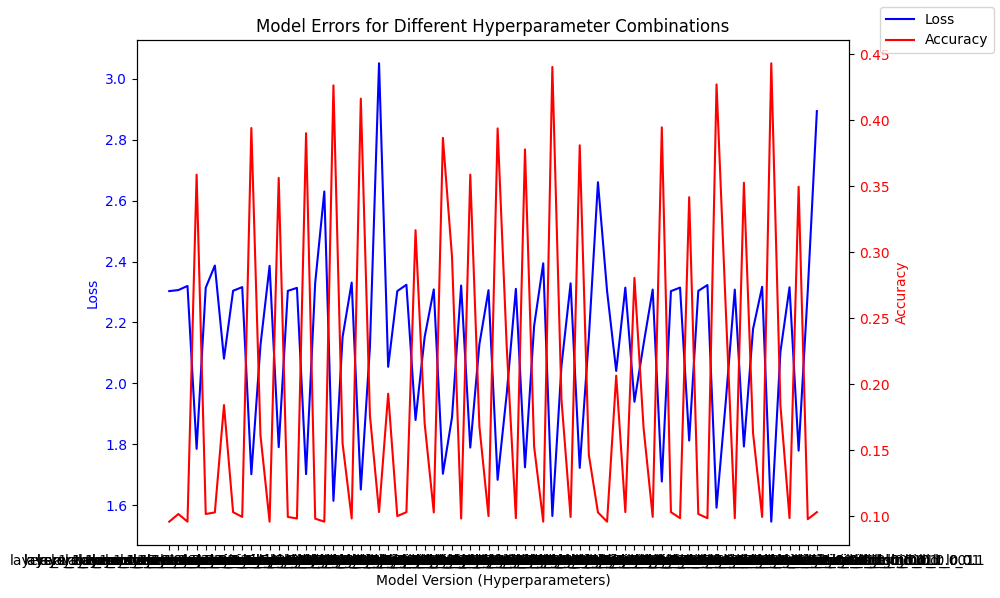

In [15]:
import matplotlib.pyplot as plt

# Extract losses and accuracies from the dictionary
losses = [model_errors[key]["loss"] for key in model_errors]
accuracies = [model_errors[key]["accuracy"] for key in model_errors]

# Create x-axis labels (model keys)
x_labels = list(model_errors.keys())

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Plot loss values on the primary y-axis
ax1.plot(x_labels, losses, color='blue', label='Loss')
ax1.set_xlabel('Model Version (Hyperparameters)')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()

# Plot accuracy values on the secondary y-axis
ax2.plot(x_labels, accuracies, color='red', label='Accuracy')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params('y', labelcolor='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
fig.legend(loc='upper right')

# Show the plot
plt.title('Model Errors for Different Hyperparameter Combinations')
plt.tight_layout()
plt.show()

In [16]:
# Find the key with the highest accuracy and lowest loss
best_model_key = max(model_errors, key=lambda k: (model_errors[k]['accuracy'], -model_errors[k]['loss']))

# Print the best model key and its corresponding values
print(f"Best Model Key: {best_model_key}")
print(f"Accuracy: {model_errors[best_model_key]['accuracy']}")
print(f"Loss: {model_errors[best_model_key]['loss']}")

Best Model Key: layers_3_neurons_128_activation_relu_lr_0.001
Accuracy: 0.44306665658950806
Loss: 1.5460315942764282


c.) Calculate and plot the training and validation losses of the tuned network.

In [18]:
# from the previous code: i know that the optimal network has 3 layers, 128 neurons each,
# uses relu for the activation function, and has a learning rate of 0.001
best_model = create_model(layers=3, neurons=128, activation='relu', learning_rate=0.001)
history = best_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_438 (Dense)                    │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_439 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_440 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_441 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 427,658 (1.63 MB)

 Trainable params: 427,658 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2603 - loss: 2.0060 - val_accuracy: 0.3452 - val_loss: 1.7949
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3692 - loss: 1.7501 - val_accuracy: 0.3965 - val_loss: 1.6761
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4010 - loss: 1.6738 - val_accuracy: 0.3981 - val_loss: 1.6734
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4205 - loss: 1.6181 - val_accuracy: 0.4185 - val_loss: 1.6027
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4305 - loss: 1.5808 - val_accuracy: 0.4154 - val_loss: 1.6269
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4440 - loss: 1.5487 - val_accuracy: 0.4305 - val_loss: 1.5848
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4613 - loss: 1.5101 - val_accuracy: 0.4377 - val_loss: 1.5685
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4686 - loss: 1

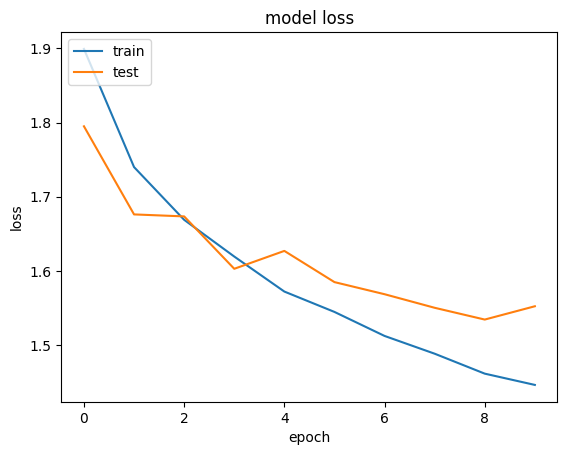

In [19]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

d.) Calculate and plot the training and validation accuracies of the tuned
network.

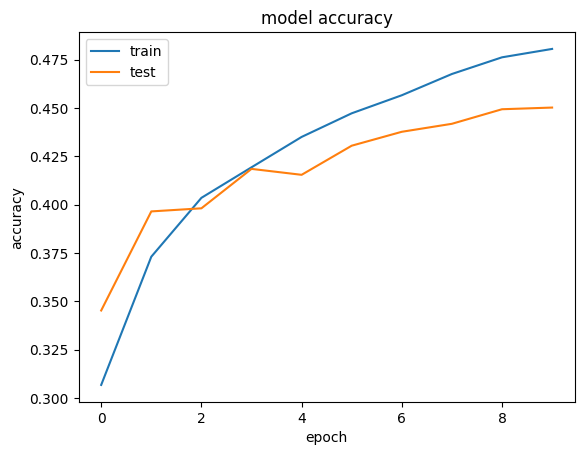

In [20]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

2. Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository.
The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds
and angles of attack. The span of the airfoil and the observer position were the same in
all of the experiments. The following attributes were measured:

i. Frequency, in Hz.

ii. Angle of attack, in degrees.

iii. Chord length, in meters.

iv. Free-stream velocity, in meters per second.

v. Suction side displacement thickness, in meters.

The only measured output was:

i. Scaled sound pressure level, in decibels.


a.) Visualize the dataset

In [15]:
pip install ucimlrepo

In [63]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
airfoil_self_noise = fetch_ucirepo(id=291)

# data (as pandas dataframes)
X = airfoil_self_noise.data.features
y = airfoil_self_noise.data.targets

# metadata
print(airfoil_self_noise.metadata)

# variable information
print(airfoil_self_noise.variables)

{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [64]:
import pandas as pd
df_X = pd.DataFrame(X)
df_X.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [65]:
df_y = pd.DataFrame(y)
df_y.head()

,scaled-sound-pressure
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461


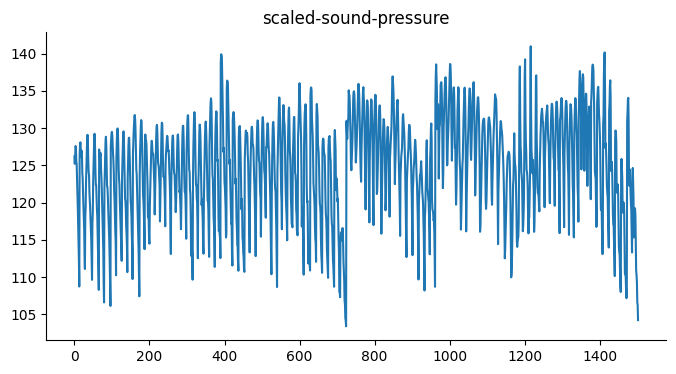

In [66]:
# @title scaled-sound-pressure

from matplotlib import pyplot as plt
df_y['scaled-sound-pressure'].plot(kind='line', figsize=(8, 4), title='scaled-sound-pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

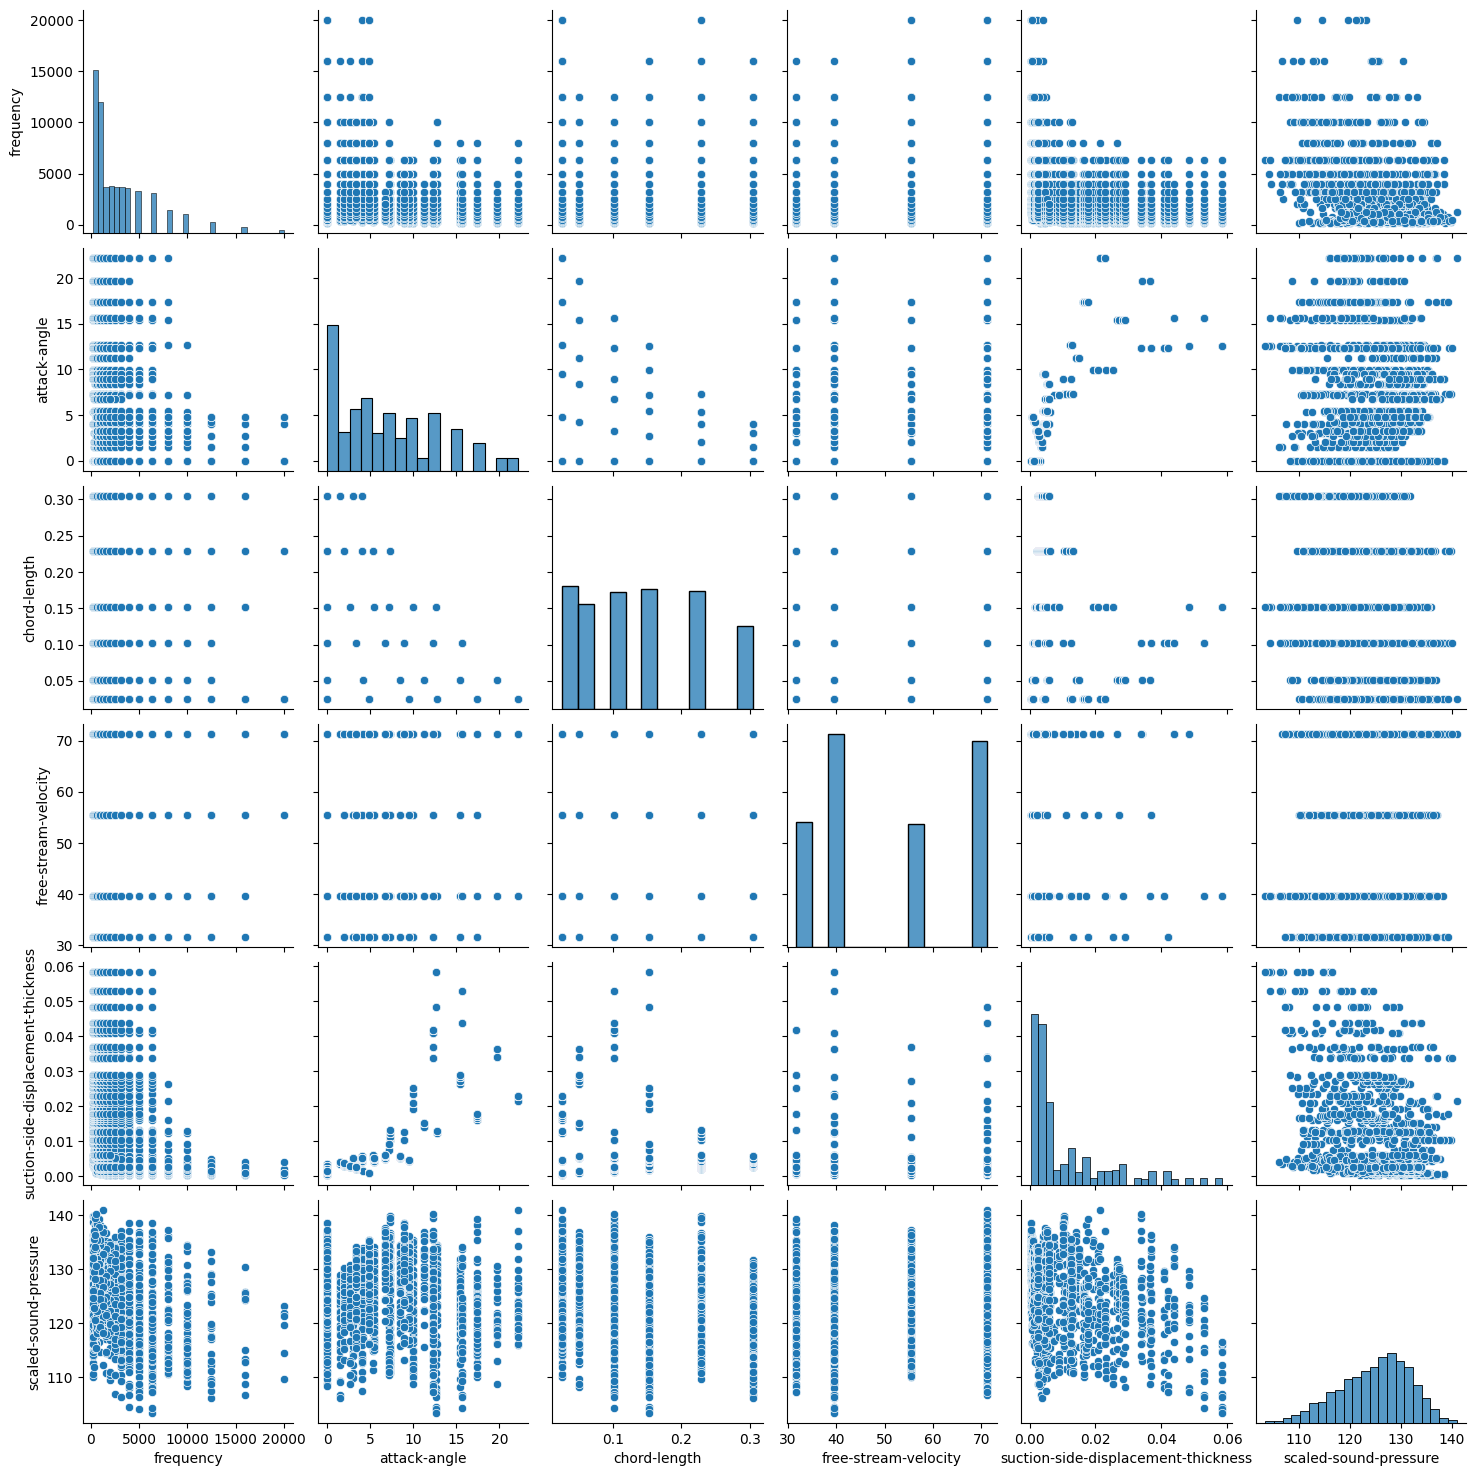

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
df_all = pd.concat([df_X, df_y], axis=1)

sns.pairplot(df_all)
plt.show()

Construct a fully connected neural network model for estimating
scaled sound pressure level, in decibels, from the attributes by choosing a 70%-30%
split.

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1052, 5)
(451, 5)
(1052, 1)
(451, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear')) # output layer for regression
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_test, y_test))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 15458.1992 - val_loss: 14826.8330
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14440.9980 - val_loss: 11623.2295
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9842.9795 - val_loss: 3199.1206
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2072.6826 - val_loss: 727.6390
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 660.9506 - val_loss: 438.6373
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 430.7350 - val_loss: 380.7981
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 389.5060 - val_loss: 340.3210
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 326.3830 - val_loss: 312.3441
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 332.5429 - val_loss: 287.1702
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 286.2463 - val_loss: 261.7842
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 278.0914 - val_loss: 241.2394
Epoch 1

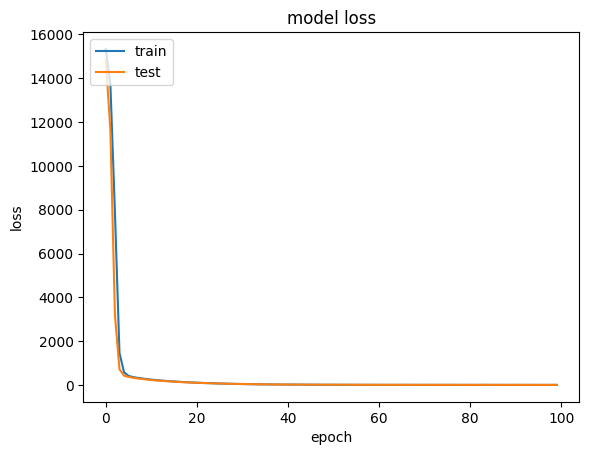

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {test_mse}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2772 
Test loss: 18.459897994995117
Test MSE: 18.459897994995117


In [75]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


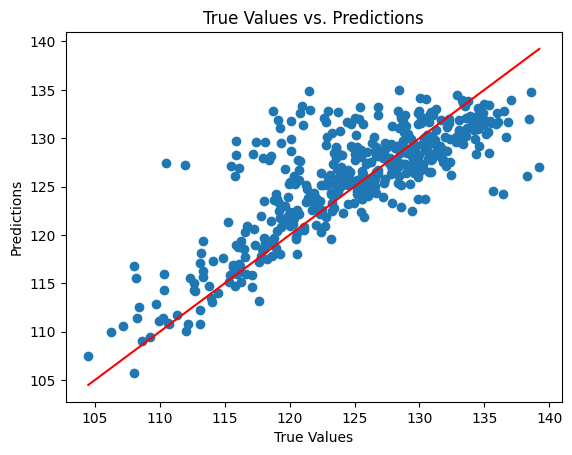

In [76]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], 'r')
plt.show()

In [77]:
df_all.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [78]:
df_pred = pd.DataFrame(y_pred, columns=['scaled-sound-pressure-predicted'])
df_pred.head()
df_all = pd.concat([df_all, df_pred], axis=1)
df_all.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure,scaled-sound-pressure-predicted
0,800,0.0,0.3048,71.3,0.002663,126.201,127.767937
1,1000,0.0,0.3048,71.3,0.002663,125.201,119.723076
2,1250,0.0,0.3048,71.3,0.002663,125.951,121.177170
3,1600,0.0,0.3048,71.3,0.002663,127.591,133.982346
4,2000,0.0,0.3048,71.3,0.002663,127.461,131.345261


In [79]:
df_all['actual-predicted'] = df_all['scaled-sound-pressure'] - df_all['scaled-sound-pressure-predicted']
df_all.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure,scaled-sound-pressure-predicted,actual-predicted
0,800,0.0,0.3048,71.3,0.002663,126.201,127.767937,-1.566937
1,1000,0.0,0.3048,71.3,0.002663,125.201,119.723076,5.477924
2,1250,0.0,0.3048,71.3,0.002663,125.951,121.177170,4.773830
3,1600,0.0,0.3048,71.3,0.002663,127.591,133.982346,-6.391346
4,2000,0.0,0.3048,71.3,0.002663,127.461,131.345261,-3.884261


c.) Calculate the coefficient of determination.

In [80]:
from sklearn.metrics import r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)

print(f"Coefficient of Determination (R²): {r2:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Coefficient of Determination (R²): 0.6090
